Connected to data_science (Python 3.12.4)

In [ ]:
import os
import torch
from data_processing import dataset_preprocessing, data_with_mask
from sph_functions import interpolation_to_grid, hemisphere_to_spherical, spherical_to_hemisphere
from plots_pavi import plot_sphere

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

file_path = os.path.join(r'C:\Github\pavi_data', '12_mean_sample_post.pt')
path_jobs = os.path.join(r'C:\Github\pavi_data\jobs.json')
path_scores = os.path.join(r'C:\Github\pavi_data', 'scores_camcan.csv')
n_job = 44

net_number = None
sh_orders = [16]

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


X, y, seed = dataset_preprocessing(DEVICE, file_path, path_jobs, path_scores)

vertices_left, vertices_right, network_left, network_right = data_with_mask(X, net_number)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [ ]:
mean_scores = []
for sh_order in sh_orders:
    mesh_theta, sphere_src_left, sphere_src_right, sphere_dst = interpolation_to_grid(vertices_left, vertices_right, sh_order)
    sph_data_left  = hemisphere_to_spherical(network_left, sphere_src_left, sphere_dst, sh_order)
    sph_data_right = hemisphere_to_spherical(network_right, sphere_src_right, sphere_dst, sh_order)

    #Me parece que podriamos hacerlo sin reshapearlo a la mesh...
    #sph_data_left = sph_data_left.reshape(-1, *mesh_theta.shape)
    #sph_data_right = sph_data_right.reshape(-1, *mesh_theta.shape)

    if isinstance(net_number, int):
        sph_data_left  = sph_data_left.reshape(-1, *mesh_theta.shape)
        sph_data_right = sph_data_right.reshape(-1, *mesh_theta.shape)
        plot_sphere(sph_data_left, net_number)
        plot_sphere(sph_data_right, net_number)
    

    fancy_categories = [
        'Benton faces',
        'Fluid Intelligence',
        'Emotion expression recognition',
        'Famous faces',
        'Hotel task',
        'Picture priming',
        'Proverb comprehension',
        'Sentence comprehension (unacceptable error)',
        'Sentence comprehension (reaction time)',
        'Visual short term memory (mean)',
        'Visual short term memory (precision)',
        'Visual short term memory (doubt)',
        'Visual short term memory (MSE)',
    ]
    n_scores = len(fancy_categories)

    sph_data =  np.concatenate((sph_data_left, sph_data_right), axis=1)
    print (sph_data.shape)
    sph_data = sph_data.reshape(sph_data_left.shape[0], -1)
    print (sph_data.shape)

    sph_data = sph_data.astype(np.float32)
    y = y.astype(np.float32)

    X_train, X_test, y_train, y_test = train_test_split(sph_data, y, random_state=42)

    model = Ridge()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores_ = np.full((n_scores,), np.nan)
    for c in range(n_scores):
        r, _ = pearsonr(y_pred[:, c], y_test[:, c])
        scores_[c] = r

    mean_scores.append(scores_.mean())

sh_order=16
(218, 64516, 17)
(218, 1096772)


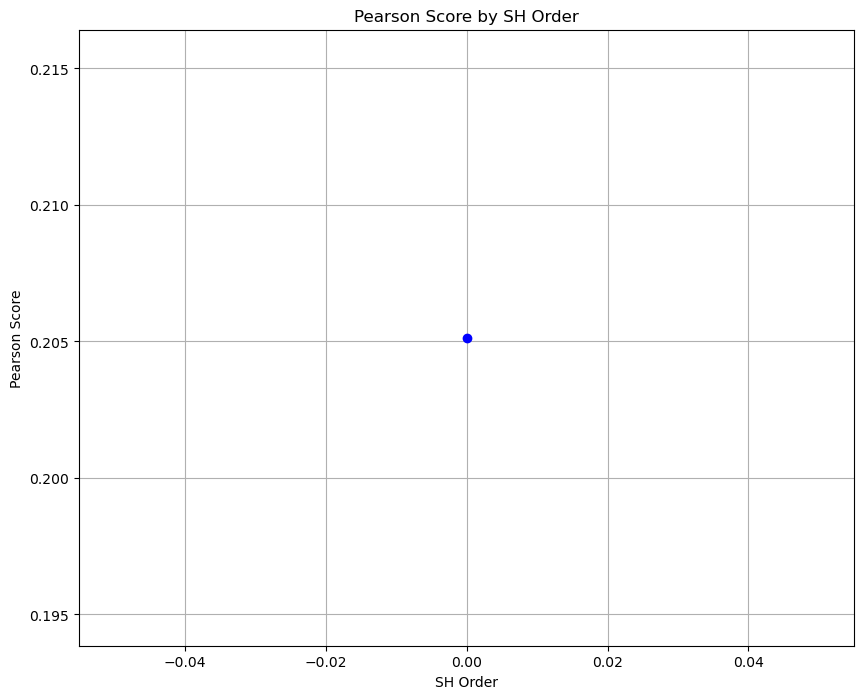

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(len(mean_scores)), mean_scores, linestyle='-', color='b', marker='o')
plt.title('Pearson Score by SH Order')
plt.xlabel('SH Order')
plt.ylabel('Pearson Score')
plt.grid(True)
plt.show()

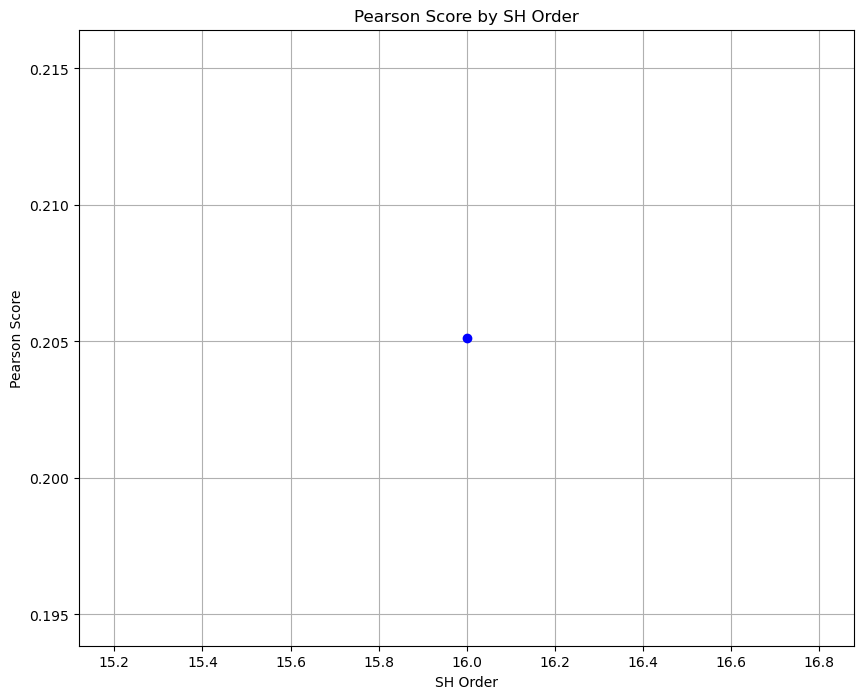

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(sh_orders, mean_scores, linestyle='-', color='b', marker='o')
plt.title('Pearson Score by SH Order')
plt.xlabel('SH Order')
plt.ylabel('Pearson Score')
plt.grid(True)
plt.show()

In [ ]:
import os
import torch
from data_processing import dataset_preprocessing, data_with_mask
from sph_functions import interpolation_to_grid, hemisphere_to_spherical, spherical_to_hemisphere
from plots_pavi import plot_sphere

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

file_path = os.path.join(r'C:\Github\pavi_data', '12_mean_sample_post.pt')
path_jobs = os.path.join(r'C:\Github\pavi_data\jobs.json')
path_scores = os.path.join(r'C:\Github\pavi_data', 'scores_camcan.csv')
n_job = 44

net_number = None
sh_orders = [8, 16, 32, 48]

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


X, y, seed = dataset_preprocessing(DEVICE, file_path, path_jobs, path_scores)

vertices_left, vertices_right, network_left, network_right = data_with_mask(X, net_number)

In [ ]:
mean_scores = []
for sh_order in sh_orders:
    mesh_theta, sphere_src_left, sphere_src_right, sphere_dst = interpolation_to_grid(vertices_left, vertices_right, sh_order)
    sph_data_left  = hemisphere_to_spherical(network_left, sphere_src_left, sphere_dst, sh_order)
    sph_data_right = hemisphere_to_spherical(network_right, sphere_src_right, sphere_dst, sh_order)

    #Me parece que podriamos hacerlo sin reshapearlo a la mesh...
    #sph_data_left = sph_data_left.reshape(-1, *mesh_theta.shape)
    #sph_data_right = sph_data_right.reshape(-1, *mesh_theta.shape)

    if isinstance(net_number, int):
        sph_data_left  = sph_data_left.reshape(-1, *mesh_theta.shape)
        sph_data_right = sph_data_right.reshape(-1, *mesh_theta.shape)
        plot_sphere(sph_data_left, net_number)
        plot_sphere(sph_data_right, net_number)
    

    fancy_categories = [
        'Benton faces',
        'Fluid Intelligence',
        'Emotion expression recognition',
        'Famous faces',
        'Hotel task',
        'Picture priming',
        'Proverb comprehension',
        'Sentence comprehension (unacceptable error)',
        'Sentence comprehension (reaction time)',
        'Visual short term memory (mean)',
        'Visual short term memory (precision)',
        'Visual short term memory (doubt)',
        'Visual short term memory (MSE)',
    ]
    n_scores = len(fancy_categories)

    sph_data =  np.concatenate((sph_data_left, sph_data_right), axis=1)
    print (sph_data.shape)
    sph_data = sph_data.reshape(sph_data_left.shape[0], -1)
    print (sph_data.shape)

    sph_data = sph_data.astype(np.float32)
    y = y.astype(np.float32)

    X_train, X_test, y_train, y_test = train_test_split(sph_data, y, random_state=42)

    model = Ridge()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores_ = np.full((n_scores,), np.nan)
    for c in range(n_scores):
        r, _ = pearsonr(y_pred[:, c], y_test[:, c])
        scores_[c] = r

    mean_scores.append(scores_.mean())

sh_order=8
(218, 64516, 17)
(218, 1096772)
sh_order=16
(218, 64516, 17)
(218, 1096772)
sh_order=32
(218, 64516, 17)
(218, 1096772)


c:\Users\joaqu\anaconda3\envs\data_science\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


sh_order=48
(218, 64516, 17)
(218, 1096772)


c:\Users\joaqu\anaconda3\envs\data_science\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


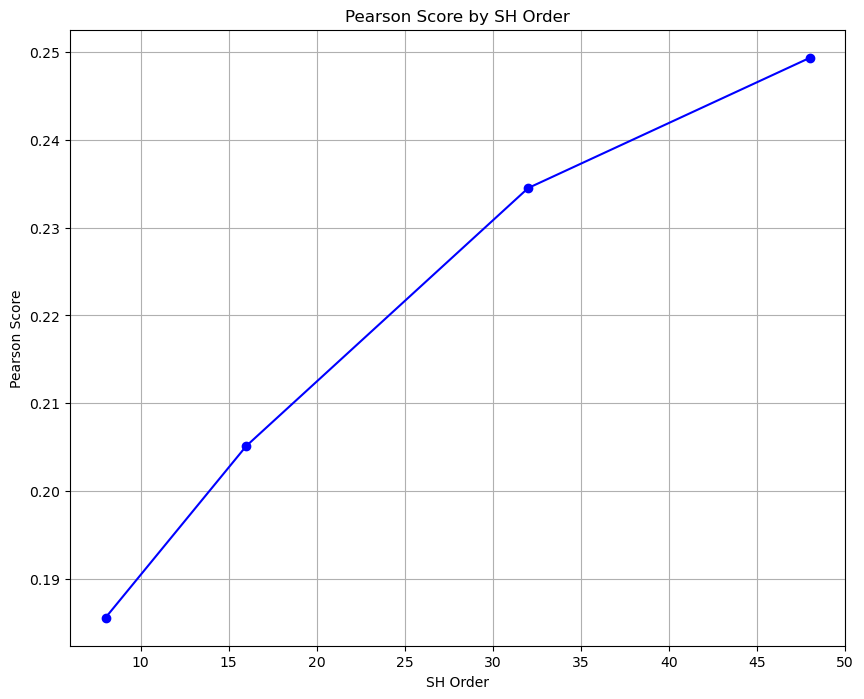

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(sh_orders, mean_scores, linestyle='-', color='b', marker='o')
plt.title('Pearson Score by SH Order')
plt.xlabel('SH Order')
plt.ylabel('Pearson Score')
plt.grid(True)
plt.show()

In [ ]:
scores_

array([ 0.17702556,  0.65858153, -0.01185129,  0.3959502 ,  0.16159854,
        0.54395987,  0.02505261, -0.17071784,  0.18086916,  0.4764491 ,
        0.42917022, -0.12055411,  0.49651096])

In [ ]:
mean_scores

[0.18554294994699097,
 0.20513735742385436,
 0.23453399846159492,
 0.24938803847068686]

In [ ]:
#%%

import os
import torch
from data_processing import dataset_preprocessing, data_with_mask
from sph_functions import interpolation_to_grid, hemisphere_to_spherical, spherical_to_hemisphere
from plots_pavi import plot_sphere

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

path_file = os.path.join(r'C:\Github\pavi_data', '12_mean_sample_post.pt')
path_jobs = os.path.join(r'C:\Github\pavi_data\jobs.json')
path_scores = os.path.join(r'C:\Github\pavi_data', 'scores_camcan.csv')
n_job = 44

net_number = None
sh_orders = [80]

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


X, y, seed = dataset_preprocessing(DEVICE, path_file, path_jobs, path_scores)

vertices_left, vertices_right, network_left, network_right = data_with_mask(X, net_number)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [ ]:
#%%

mean_scores = []
for sh_order in sh_orders:
    mesh_theta, sphere_src_left, sphere_src_right, sphere_dst = interpolation_to_grid(vertices_left, vertices_right, sh_order)
    sph_data_left  = hemisphere_to_spherical(network_left, sphere_src_left, sphere_dst, sh_order)
    sph_data_right = hemisphere_to_spherical(network_right, sphere_src_right, sphere_dst, sh_order)

    #Me parece que podriamos hacerlo sin reshapearlo a la mesh...
    #sph_data_left = sph_data_left.reshape(-1, *mesh_theta.shape)
    #sph_data_right = sph_data_right.reshape(-1, *mesh_theta.shape)

    if isinstance(net_number, int):
        sph_data_left  = sph_data_left.reshape(-1, *mesh_theta.shape)
        sph_data_right = sph_data_right.reshape(-1, *mesh_theta.shape)
        plot_sphere(sph_data_left, net_number)
        plot_sphere(sph_data_right, net_number)
    

    fancy_categories = [
        'Benton faces',
        'Fluid Intelligence',
        'Emotion expression recognition',
        'Famous faces',
        'Hotel task',
        'Picture priming',
        'Proverb comprehension',
        'Sentence comprehension (unacceptable error)',
        'Sentence comprehension (reaction time)',
        'Visual short term memory (mean)',
        'Visual short term memory (precision)',
        'Visual short term memory (doubt)',
        'Visual short term memory (MSE)',
    ]
    n_scores = len(fancy_categories)

    sph_data =  np.concatenate((sph_data_left, sph_data_right), axis=1)
    print (sph_data.shape)
    sph_data = sph_data.reshape(sph_data_left.shape[0], -1)
    print (sph_data.shape)

    sph_data = sph_data.astype(np.float32)
    y = y.astype(np.float32)

    X_train, X_test, y_train, y_test = train_test_split(sph_data, y, random_state=42)

    model = Ridge()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores_ = np.full((n_scores,), np.nan)
    for c in range(n_scores):
        r, _ = pearsonr(y_pred[:, c], y_test[:, c])
        scores_[c] = r

    mean_scores.append(scores_.mean())

sh_order=80
(218, 64516, 17)
(218, 1096772)


c:\Users\joaqu\anaconda3\envs\data_science\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


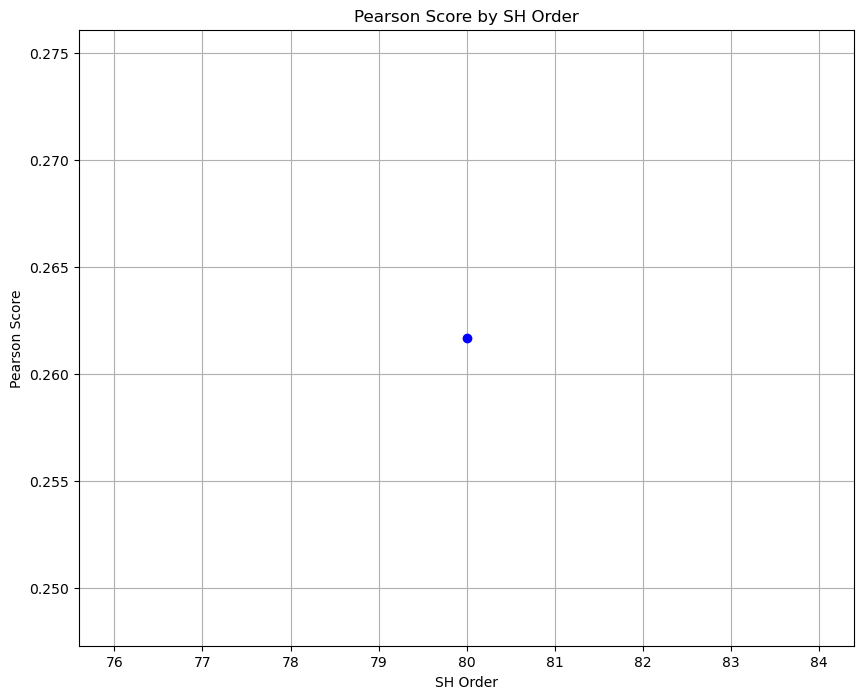

In [ ]:
#%%

plt.figure(figsize=(10,8))
plt.plot(sh_orders, mean_scores, linestyle='-', color='b', marker='o')
plt.title('Pearson Score by SH Order')
plt.xlabel('SH Order')
plt.ylabel('Pearson Score')
plt.grid(True)
plt.show()

In [ ]:
# %%

mean_scores

[0.2617026489456643]